In [169]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, precision_score, roc_auc_score, roc_curve, accuracy_score

In [170]:
import seaborn as sns

In [171]:
#read csv file from online github 
df2 = 'https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/conversion_data.csv'
df = pd.read_csv(df2)
df

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1996,Europe,organic,F,3,0,0,4,2,...,22,51,44,29,5,1,5,7,7,0
1996,1996,1997,South America,google,M,1,2,0,4,1,...,54,33,59,38,1,6,6,7,6,0
1997,1997,1998,Asia,facebook,M,2,3,0,0,8,...,32,30,48,38,2,1,7,6,4,0
1998,1998,1999,South America,youtube,F,2,2,2,5,5,...,21,51,41,56,6,4,2,2,3,1


In [172]:
df.head()

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

We can find that there is no missing value

In [174]:
df.drop('Unnamed: 0', axis=1, inplace = True) #drop the Unnamed: 0 Column

In [175]:
df.info() # understanding our DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_id         2000 non-null   int64  
 1   visitor_location   2000 non-null   object 
 2   marketing_channel  2000 non-null   object 
 3   gender             2000 non-null   object 
 4   product_views_Mon  2000 non-null   int64  
 5   product_views_Tue  2000 non-null   int64  
 6   product_views_Wed  2000 non-null   int64  
 7   product_views_Thu  2000 non-null   int64  
 8   product_views_Fri  2000 non-null   int64  
 9   avg_rating_Mon     2000 non-null   float64
 10  avg_rating_Tue     2000 non-null   float64
 11  avg_rating_Wed     2000 non-null   float64
 12  avg_rating_Thu     2000 non-null   float64
 13  avg_rating_Fri     2000 non-null   float64
 14  avg_price_Mon      2000 non-null   float64
 15  avg_price_Tue      2000 non-null   float64
 16  avg_price_Wed      2000 

In [176]:
distinct_values_Location = df['visitor_location'].unique()
distinct_values_Variant = df['marketing_channel'].unique()
distinct_values_gender = df['gender'].unique()
print(distinct_values_Location)
print(distinct_values_Variant)
print(distinct_values_gender)

['North America' 'South America' 'Australia' 'Asia' 'Europe']
['youtube' 'organic' 'instagram' 'facebook' 'google']
['M' 'F']


In [177]:
df.set_index('visitor_id', inplace=True)

In [178]:
df.describe(include = 'all')

,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,avg_rating_Tue,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
unique,5,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,South America,instagram,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,433,431,1093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.541500,2.440500,2.441000,2.256500,2.354000,3.023990,3.042760,...,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,NaN,NaN,NaN,1.704914,1.715206,2.343345,2.370974,2.335682,1.151037,1.154019,...,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,-4.000000,-3.000000,1.000000,1.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,2.017500,2.057500,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,NaN,NaN,NaN,3.000000,2.000000,2.000000,2.000000,2.000000,3.055000,3.080000,...,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,5.000000,4.022500,4.030000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000


In [179]:
df.groupby('converted_Fri').count()

,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,avg_rating_Tue,...,time_on_site_Mon,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri
converted_Fri,,,,,,,,,,,,,,,,,,,,,
0,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,...,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256
1,744,744,744,744,744,744,744,744,744,744,...,744,744,744,744,744,744,744,744,744,744


In [180]:
df.columns

Index(['visitor_location', 'marketing_channel', 'gender', 'product_views_Mon',
       'product_views_Tue', 'product_views_Wed', 'product_views_Thu',
       'product_views_Fri', 'avg_rating_Mon', 'avg_rating_Tue',
       'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri', 'avg_price_Mon',
       'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu', 'avg_price_Fri',
       'time_on_site_Mon', 'time_on_site_Tue', 'time_on_site_Wed',
       'time_on_site_Thu', 'time_on_site_Fri', 'pages_visited_Mon',
       'pages_visited_Tue', 'pages_visited_Wed', 'pages_visited_Thu',
       'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

In [181]:
df.drop_duplicates(inplace=True) #We need to drop rows with all values are the same
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_location   2000 non-null   object 
 1   marketing_channel  2000 non-null   object 
 2   gender             2000 non-null   object 
 3   product_views_Mon  2000 non-null   int64  
 4   product_views_Tue  2000 non-null   int64  
 5   product_views_Wed  2000 non-null   int64  
 6   product_views_Thu  2000 non-null   int64  
 7   product_views_Fri  2000 non-null   int64  
 8   avg_rating_Mon     2000 non-null   float64
 9   avg_rating_Tue     2000 non-null   float64
 10  avg_rating_Wed     2000 non-null   float64
 11  avg_rating_Thu     2000 non-null   float64
 12  avg_rating_Fri     2000 non-null   float64
 13  avg_price_Mon      2000 non-null   float64
 14  avg_price_Tue      2000 non-null   float64
 15  avg_price_Wed      2000 non-null   float64
 16  avg_price_Thu      2000 

Because there are too many columns, we now group the data into fewer columns: We calculate the average of product view, avg rating, avg,

In [182]:
df['product_views_total'] = (df['product_views_Mon'] + df['product_views_Tue'] + df['product_views_Wed'] + df['product_views_Thu'] + df['product_views_Fri'])/5
df['avg_rating_total'] = (df['avg_rating_Mon'] + df['avg_rating_Tue'] + df['avg_rating_Wed'] + df['avg_rating_Thu'] + df['avg_rating_Fri'])/5
df['avg_price_total'] = (df['avg_price_Mon'] + df['avg_price_Tue'] + df['avg_price_Wed'] + df['avg_price_Thu'] + df['avg_price_Fri'])/5
df['time_on_site_total'] = (df['time_on_site_Mon'] + df['time_on_site_Tue'] + df['time_on_site_Wed'] + df['time_on_site_Thu'] + df['time_on_site_Fri'])/5
df['pages_visited_total'] = (df['pages_visited_Mon'] + df['pages_visited_Tue'] + df['pages_visited_Wed'] + df['pages_visited_Thu'] + df['pages_visited_Fri'])/5


In [183]:
dummies_gender = pd.get_dummies(df.gender, dtype=int)

In [184]:
df = pd.concat([df,dummies_gender.iloc[:, 1]], axis=1)

In [185]:
df.head()

,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,avg_rating_Tue,...,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri,product_views_total,avg_rating_total,avg_price_total,time_on_site_total,pages_visited_total,M
visitor_id,,,,,,,,,,,,,,,,,,,,,
1,North America,youtube,M,4,5,2,1,2,3.90,2.19,...,5,4,6,1,2.8,3.134,54.738,43.2,4.8,1
2,South America,organic,F,2,5,0,1,5,1.31,2.16,...,7,6,2,0,2.6,2.068,71.432,33.2,5.2,0
3,Australia,instagram,M,3,4,0,-3,5,3.26,4.79,...,3,2,3,1,1.8,3.666,64.358,28.8,2.4,1
4,North America,facebook,M,1,0,0,5,0,2.66,4.79,...,7,7,1,0,1.2,3.300,56.048,37.2,4.4,1
5,Asia,instagram,F,1,5,2,2,3,2.76,2.38,...,5,2,4,1,2.6,2.364,46.442,44.6,4.6,0


Column M represents gender: male or not 

<AxesSubplot:xlabel='converted_Fri', ylabel='time_on_site_total'>

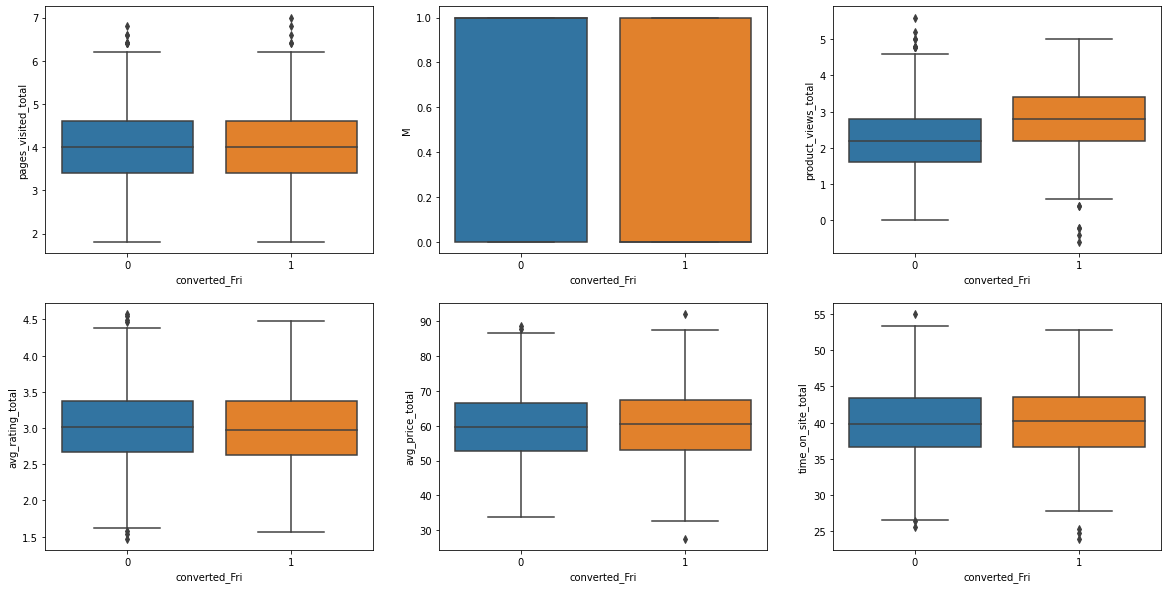

In [186]:
import matplotlib.pyplot as plt

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(x='converted_Fri', y='pages_visited_total', ax=ax1, data=df)
sns.boxplot(x='converted_Fri', y='M', ax=ax2, data=df)
sns.boxplot(x='converted_Fri', y='product_views_total', ax=ax3, data=df)
sns.boxplot(x='converted_Fri', y='avg_rating_total', ax=ax4, data=df)
sns.boxplot(x='converted_Fri', y='avg_price_total', ax=ax5, data=df)
sns.boxplot(x='converted_Fri', y='time_on_site_total', ax=ax6, data=df)

In [187]:
df.drop(df[(df['pages_visited_total']>=6.5)].index,axis =0,
        inplace=True)
df.drop(df[(df['product_views_total']>=5)].index,axis =0,
        inplace=True)
df.drop(df[(df['avg_price_total']>=90)].index,axis =0,
        inplace=True)
df.drop(df[(df['time_on_site_total']<25)].index,axis =0,
        inplace=True)

<AxesSubplot:xlabel='converted_Fri', ylabel='time_on_site_total'>

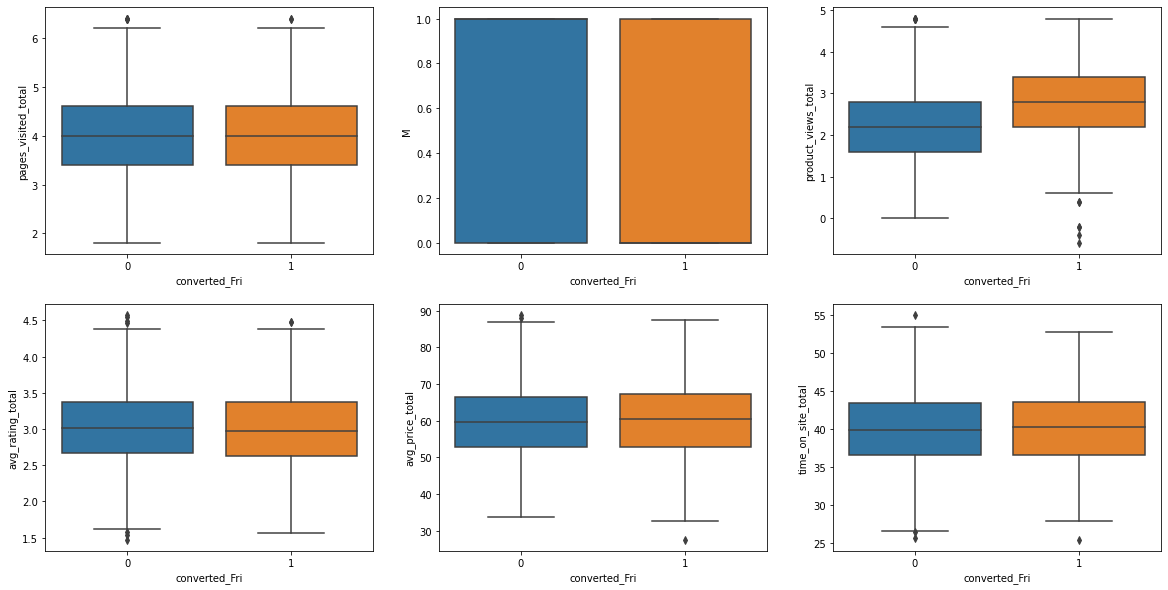

In [188]:

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(x='converted_Fri', y='pages_visited_total', ax=ax1, data=df)
sns.boxplot(x='converted_Fri', y='M', ax=ax2, data=df)
sns.boxplot(x='converted_Fri', y='product_views_total', ax=ax3, data=df)
sns.boxplot(x='converted_Fri', y='avg_rating_total', ax=ax4, data=df)
sns.boxplot(x='converted_Fri', y='avg_price_total', ax=ax5, data=df)
sns.boxplot(x='converted_Fri', y='time_on_site_total', ax=ax6, data=df)

Now we removed the outliers

In [189]:
df.groupby('converted_Fri').describe()

product_views_Mon                                               \
                          count      mean       std  min  25%  50%  75%  max   
converted_Fri                                                                  
0                        1249.0  2.551641  1.713193  0.0  1.0  3.0  4.0  5.0   
1                         735.0  2.506122  1.684891  0.0  1.0  2.0  4.0  5.0   

              product_views_Tue            ... pages_visited_total       \
                          count      mean  ...                 75%  max   
converted_Fri                              ...                            
0                        1249.0  2.405925  ...                 4.6  6.4   
1                         735.0  2.480272  ...                 4.6  6.4   

                    M                                               
                count      mean       std  min  25%  50%  75%  max  
converted_Fri                                                       
0              1249.0  0.521217  0.499750  0.0  0.0  1.0  1.0  1.0  
1               735.0  0.341497  0.474535  0.0  0.0  0.0  1.0  1.0  

[2 rows x 248 columns]

Now, we do hypothesis testing first to see if there are significant data.

In [190]:
from scipy import stats

In [191]:
var1 = df[df['converted_Fri']== 0]['pages_visited_total']
control = df[df['converted_Fri']== 1]['pages_visited_total']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=0.7158392935819694, pvalue=0.47417491069893547)


In [192]:
var1 = df[df['converted_Fri']== 0]['product_views_total']
control = df[df['converted_Fri']== 1]['product_views_total']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=-15.59362479491596, pvalue=8.449005105576238e-52)


In [193]:
var1 = df[df['converted_Fri']== 0]['M']
control = df[df['converted_Fri']== 1]['M']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=7.880553213887422, pvalue=5.33020994355421e-15)


In [194]:
var1 = df[df['converted_Fri']== 0]['avg_rating_total']
control = df[df['converted_Fri']== 1]['avg_rating_total']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=0.46369653327631166, pvalue=0.642916099028326)


In [195]:

var1 = df[df['converted_Fri']== 0]['avg_price_total']
control = df[df['converted_Fri']== 1]['avg_price_total']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=-0.9556485774285239, pvalue=0.33936635270321724)


In [196]:
var1 = df[df['converted_Fri']== 0]['time_on_site_total']
control = df[df['converted_Fri']== 1]['time_on_site_total']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=-0.42619598879199316, pvalue=0.6700113204907692)


In [ ]:
# checking location
loc_1 = df[df['visitor_location'] == 'Location 1']['converted_Fri']
loc_2 = df[df['visitor_location'] == 'Location 2']['converted_Fri']
loc_3 = df[df['visitor_location'] == 'Location 3']['converted_Fri']
loc_4 = df[df['visitor_location'] == 'Location 4']['converted_Fri']
loc_5 = df[df['visitor_location'] == 'Location 5']['converted_Fri']
p_val = stats.f_oneway(loc_1, loc_2, loc_3,loc_4,loc_5)
print(p_val)

We can find that column M, product_views_total are the significant one. 